In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [3]:
df['Internet Service'] = df.apply(lambda row: 'Not Available' if row['Games Product'] == 'No internet service' 
                                  else 'Available',axis=1)
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Internet Service
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,Available
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,Available
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,Available
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,Available
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8,Not Available
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0,Available
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0,Available
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9,Available


# EDA

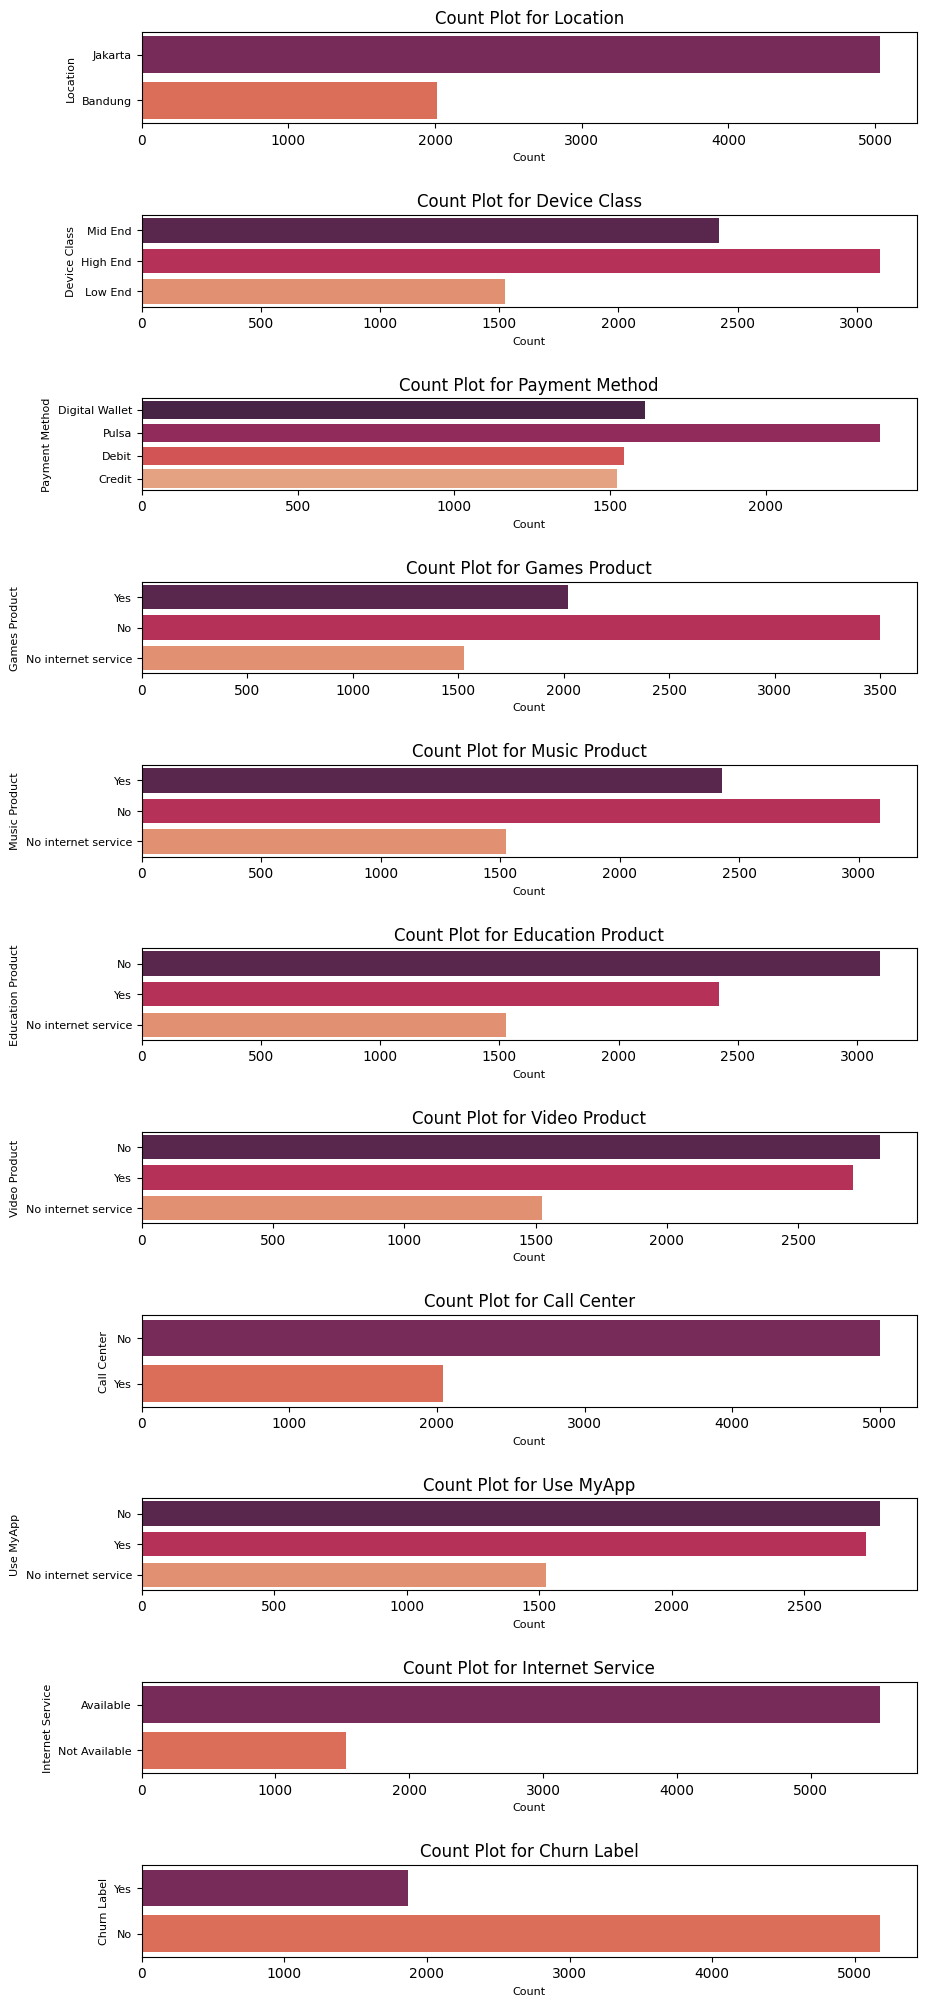

In [4]:
categorical_columns = ['Location', 'Device Class', 'Payment Method',
                       'Games Product', 'Music Product', 'Education Product', 
                       'Video Product', 'Call Center', 'Use MyApp', 'Internet Service', 'Churn Label']

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, 25))
plt.subplots_adjust(hspace=1)  # Adjust vertical spacing between subplots

for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i], palette='rocket')  # You can choose a different color palette
    ax[i].set_title(f'Count Plot for {feature}', fontsize=12)
    ax[i].set_xlabel('Count', fontsize=8)
    ax[i].set_ylabel(feature, fontsize=8)
    # Customize y-axis tick size
    ax[i].tick_params(axis='y', labelsize=8)

plt.show()


In [28]:
df_churn = df[['Tenure Months', 'Location', 'Device Class', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
               'CLTV (Predicted Thou. IDR)', 'Games Product', 'Music Product',
               'Education Product', 'Video Product', 'Call Center', 'Use MyApp', 'Internet Service','Churn Label']]
df_churn

,Tenure Months,Location,Device Class,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Games Product,Music Product,Education Product,Video Product,Call Center,Use MyApp,Internet Service,Churn Label
0,2,Jakarta,Mid End,Digital Wallet,70.005,4210.7,Yes,Yes,No,No,No,No,Available,Yes
1,2,Jakarta,High End,Pulsa,91.910,3511.3,No,No,No,No,No,No,Available,Yes
2,8,Jakarta,High End,Pulsa,129.545,6983.6,No,No,Yes,Yes,No,Yes,Available,Yes
3,28,Jakarta,High End,Pulsa,136.240,6503.9,No,No,Yes,Yes,Yes,Yes,Available,Yes
4,49,Jakarta,High End,Debit,134.810,6942.0,No,Yes,Yes,Yes,No,Yes,Available,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,Debit,27.495,6897.8,No internet service,No internet service,No internet service,No internet service,No,No internet service,Not Available,No
7039,24,Jakarta,Mid End,Digital Wallet,110.240,2782.0,Yes,No,Yes,Yes,Yes,Yes,Available,No
7040,72,Jakarta,High End,Credit,134.160,7228.0,No,Yes,Yes,Yes,No,Yes,Available,No
7041,11,Jakarta,Mid End,Pulsa,38.480,3630.9,Yes,No,No,No,No,No,Available,No


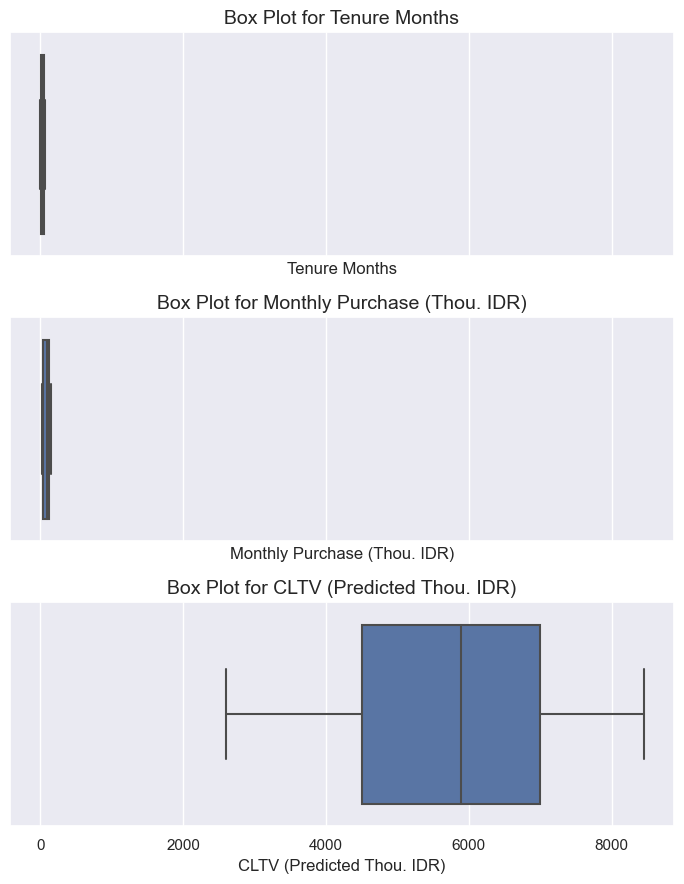

In [29]:
numerical_columns = ['Tenure Months', 'Monthly Purchase (Thou. IDR)',
                     'CLTV (Predicted Thou. IDR)']

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(7, 9), sharex=True)
    
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            
        ax[i].set_title(f'Box Plot for {feature}', fontsize=14)
        ax[i].set_xlabel(feature, fontsize=12)
        ax[i].set_ylabel(None)  # Remove y-axis labels for subplots
    
    plt.tight_layout()
    plt.show()

# Example usage
numerical_dis_plot(features=numerical_columns, df=df_churn)


In [30]:
df_churn.dtypes

Tenure Months                     int64
Location                         object
Device Class                     object
Payment Method                   object
Monthly Purchase (Thou. IDR)    float64
CLTV (Predicted Thou. IDR)      float64
Games Product                    object
Music Product                    object
Education Product                object
Video Product                    object
Call Center                      object
Use MyApp                        object
Internet Service                 object
Churn Label                      object
dtype: object

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [32]:
le_location = preprocessing.LabelEncoder()
le_device_class = preprocessing.LabelEncoder()
le_payment_method = preprocessing.LabelEncoder()
le_games_product = preprocessing.LabelEncoder()
le_music_product = preprocessing.LabelEncoder()
le_education_product = preprocessing.LabelEncoder()
le_video_product = preprocessing.LabelEncoder()
le_call_center = preprocessing.LabelEncoder()
le_use_myapp = preprocessing.LabelEncoder()
le_internet_service = preprocessing.LabelEncoder()
le_churn_label = preprocessing.LabelEncoder()

In [33]:
df_churn["Location"] = le_location.fit_transform(df_churn["Location"])
df_churn["Device Class"] = le_device_class.fit_transform(df_churn["Device Class"])
df_churn["Payment Method"] = le_payment_method.fit_transform(df_churn["Payment Method"])
df_churn["Games Product"] = le_games_product.fit_transform(df_churn["Games Product"])
df_churn["Music Product"] = le_music_product.fit_transform(df_churn["Music Product"])
df_churn["Education Product"] = le_education_product.fit_transform(df_churn["Education Product"])
df_churn["Video Product"] = le_video_product.fit_transform(df_churn["Video Product"])
df_churn["Call Center"] = le_call_center.fit_transform(df_churn["Call Center"])
df_churn["Use MyApp"] = le_use_myapp.fit_transform(df_churn["Use MyApp"])
df_churn["Internet Service"] = le_internet_service.fit_transform(
    df_churn["Internet Service"])
df_churn["Churn Label"] = le_churn_label.fit_transform(df_churn["Churn Label"])

In [34]:
import joblib

joblib.dump(le_location, "models/le_location.joblib")
joblib.dump(le_device_class, "models/le_device_class.joblib")
joblib.dump(le_payment_method, "models/le_payment_method.joblib")
joblib.dump(le_games_product, "models/le_games_product.joblib")
joblib.dump(le_music_product, "models/le_music_product.joblib")
joblib.dump(le_education_product, "models/le_education_product.joblib")
joblib.dump(le_video_product, "models/le_video_product.joblib")
joblib.dump(le_call_center, "models/le_call_center.joblib")
joblib.dump(le_use_myapp, "models/le_use_myapp.joblib")
joblib.dump(le_internet_service, "models/le_internet_service.joblib")
joblib.dump(le_churn_label, "models/le_churn_label.joblib")

['models/le_churn_label.joblib']

In [35]:
df_churn

,Tenure Months,Location,Device Class,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Games Product,Music Product,Education Product,Video Product,Call Center,Use MyApp,Internet Service,Churn Label
0,2,1,2,2,70.005,4210.7,2,2,0,0,0,0,0,1
1,2,1,0,3,91.910,3511.3,0,0,0,0,0,0,0,1
2,8,1,0,3,129.545,6983.6,0,0,2,2,0,2,0,1
3,28,1,0,3,136.240,6503.9,0,0,2,2,1,2,0,1
4,49,1,0,1,134.810,6942.0,0,2,2,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,1,1,27.495,6897.8,1,1,1,1,0,1,1,0
7039,24,1,2,2,110.240,2782.0,2,0,2,2,1,2,0,0
7040,72,1,0,0,134.160,7228.0,0,2,2,2,0,2,0,0
7041,11,1,2,3,38.480,3630.9,2,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Heatmap')

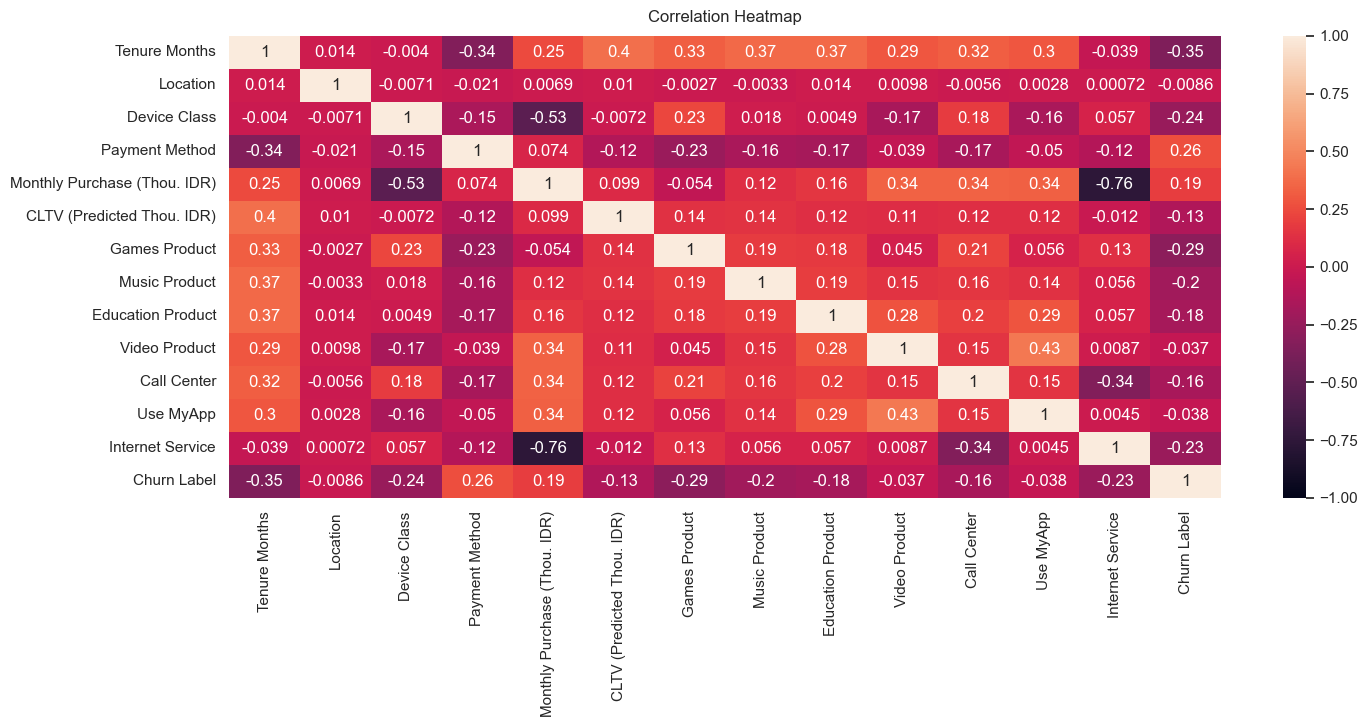

In [36]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_churn.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10)

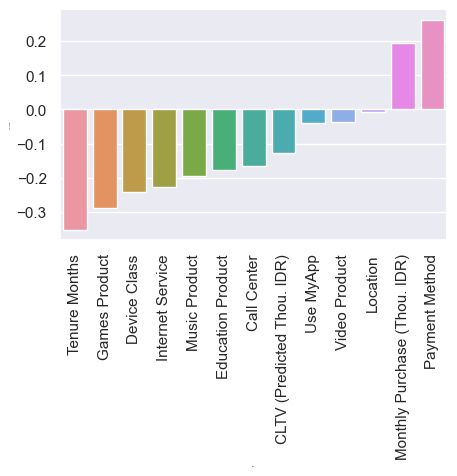

In [37]:
#Using Pearson Correlation

corr = df_churn.corr()["Churn Label"].sort_values().reset_index()
corr = corr[~corr["index"].str.contains("Churn Label")]

chart = sns.barplot(data=corr, x="index", y="Churn Label")
sns.set( rc = {'figure.figsize' : (5, 3), 
               'axes.labelsize' : 1 })

for item in chart.get_xticklabels():
  item.set_rotation(90)

# Check Multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

if 'Churn Label' in df_churn.columns:
    # Add a constant term to the DataFrame (required for VIF calculation)
    X = add_constant(df_churn.drop('Churn Label', axis=1))

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Display the VIF values
    print(vif_data)
else:
    print("Column 'Churn Label' not found in the DataFrame.")


                        Variable         VIF
0                          const  158.143399
1                  Tenure Months    1.856965
2                       Location    1.001120
3                   Device Class    6.474668
4                 Payment Method    1.205336
5   Monthly Purchase (Thou. IDR)   23.275901
6     CLTV (Predicted Thou. IDR)    1.188402
7                  Games Product    1.400932
8                  Music Product    1.318006
9              Education Product    1.374614
10                 Video Product    1.831240
11                   Call Center    1.578679
12                     Use MyApp    1.819586
13              Internet Service   13.594308


# Standarization Data

# Split Data

## Split Data for Features and Target

In [39]:
X = df_churn.drop(columns="Churn Label", axis=1)
Y = df_churn["Churn Label"]

In [40]:
X

,Tenure Months,Location,Device Class,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Games Product,Music Product,Education Product,Video Product,Call Center,Use MyApp,Internet Service
0,2,1,2,2,70.005,4210.7,2,2,0,0,0,0,0
1,2,1,0,3,91.910,3511.3,0,0,0,0,0,0,0
2,8,1,0,3,129.545,6983.6,0,0,2,2,0,2,0
3,28,1,0,3,136.240,6503.9,0,0,2,2,1,2,0
4,49,1,0,1,134.810,6942.0,0,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,1,1,27.495,6897.8,1,1,1,1,0,1,1
7039,24,1,2,2,110.240,2782.0,2,0,2,2,1,2,0
7040,72,1,0,0,134.160,7228.0,0,2,2,2,0,2,0
7041,11,1,2,3,38.480,3630.9,2,0,0,0,0,0,0


## Standardized Data

In [41]:
from sklearn.preprocessing import StandardScaler

for column in numerical_columns:
    scaler = StandardScaler()
    x_ = np.asanyarray(X[column])
    x_ = x_.reshape(-1, 1)
    scaler.fit(x_)
    X["{}".format(column)] = scaler.transform(x_)
    joblib.dump(scaler, "models/scaler_{}.joblib".format(column))

# scaler = StandardScaler()
# # Fit and transform the data
# scaler.fit(X[numerical_columns])
# X[numerical_columns] = scaler.transform(X[numerical_columns])
# # Convert the standardized data back to a DataFrame (optional)
df_standardized = pd.DataFrame(X, columns=X.columns)
df_standardized

,Tenure Months,Location,Device Class,Payment Method,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Games Product,Music Product,Education Product,Video Product,Call Center,Use MyApp,Internet Service
0,-1.236724,1,2,2,-0.362660,-0.981675,2,2,0,0,0,0,0
1,-1.236724,1,0,3,0.197365,-1.436462,0,0,0,0,0,0,0
2,-0.992402,1,0,3,1.159546,0.821409,0,0,2,2,0,2,0
3,-0.177995,1,0,3,1.330711,0.509483,0,0,2,2,1,2,0
4,0.677133,1,0,1,1.294151,0.794358,0,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.613701,1,1,1,-1.449476,0.765617,1,1,1,1,0,1,1
7039,-0.340876,1,2,2,0.665992,-1.910691,2,0,2,2,1,2,0
7040,1.613701,1,0,0,1.277533,0.980330,0,2,2,2,0,2,0
7041,-0.870241,1,2,3,-1.168632,-1.358692,2,0,0,0,0,0,0


## Split Data for Train and Test

In [43]:
from sklearn.model_selection import train_test_split

# test size 0.3 mean is 70% goes to training data, and 30% goes to testing data
X_train, X_test, Y_train, Y_test = train_test_split(df_standardized, Y, test_size=0.3, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7043, 13) (4930, 13) (2113, 13)


# Develope Model Machine Learning

In [45]:
from sklearn import metrics
from sklearn.metrics import make_scorer,f1_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Logistic Regression

In [19]:
model_lr = LogisticRegression()

# training the Logistic Regression model with training data
model_lr.fit(X_train, Y_train)

# accuracy on training data
X_train_pred = model_lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

# accuracy on test data
X_test_pred = model_lr.predict(X_test) # lrpred = lr.predict(test_features)
testing_data_accuracy = accuracy_score(X_test_pred, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy)

Accuracy on Training Data:  0.7959432048681542
Accuracy on Testing Data:  0.8026502602934217


In [20]:
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



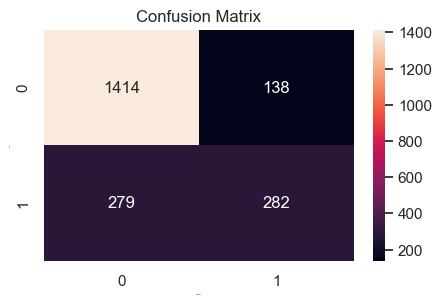

In [21]:
cm = confusion_matrix(Y_test, X_test_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## XGBoost 

In [58]:
import xgboost as xgb

# Initialize the XGBoost classifier
model_XG = xgb.XGBClassifier()

# Train the model
model_XG.fit(X_train, Y_train)

# accuracy on training data
X_train_pred_XG = model_XG.predict(X_train)
training_data_accuracy_XG = accuracy_score(X_train_pred_XG, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy_XG)

# accuracy on test data
X_test_pred_XG = model_XG.predict(X_test) # lrpred = lr.predict(test_features)
testing_data_accuracy_XG = accuracy_score(X_test_pred_XG, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy_XG)

Accuracy on Training Data:  0.9515212981744422
Accuracy on Testing Data:  0.7775674396592522


In [59]:
print(classification_report(Y_test, X_test_pred_XG))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



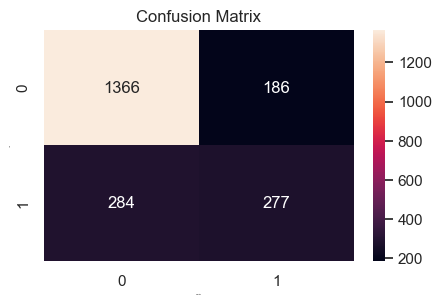

In [60]:
cm_XG = confusion_matrix(Y_test, X_test_pred_XG)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_XG, annot=True, fmt="d", cmap="rocket", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameters and their potential values for tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.8064363464268812


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.8064363464268812

In [46]:
import xgboost as xgb

# Initialize the XGBoost classifier
model_XG = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=50,
    subsample=0.8
)

# Train the model
model_XG.fit(X_train, Y_train)

# accuracy on training data
X_train_pred_XG = model_XG.predict(X_train)
training_data_accuracy_XG = accuracy_score(X_train_pred_XG, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy_XG)

# accuracy on test data
X_test_pred_XG = model_XG.predict(X_test)  # lrpred = lr.predict(test_features)
testing_data_accuracy_XG = accuracy_score(X_test_pred_XG, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy_XG)

Accuracy on Training Data:  0.8068965517241379
Accuracy on Testing Data:  0.8050165641268339


In [47]:
print(classification_report(Y_test, X_test_pred_XG))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.68      0.51      0.58       561

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.81      0.80      2113



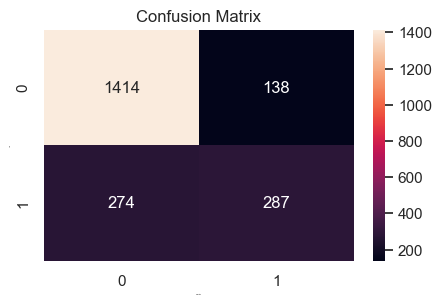

In [48]:
cm_XG = confusion_matrix(Y_test, X_test_pred_XG)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_XG, annot=True, fmt="d", cmap="rocket", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

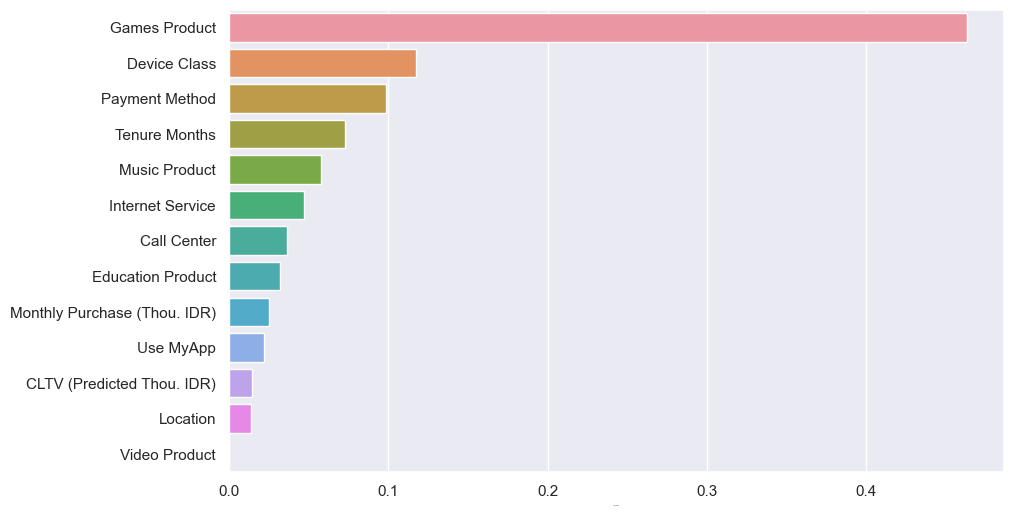

,coef_value
Games Product,0.463733
Device Class,0.117272
Payment Method,0.098722
Tenure Months,0.072751
Music Product,0.057767
Internet Service,0.047128
Call Center,0.036076
Education Product,0.032094
Monthly Purchase (Thou. IDR),0.024817
Use MyApp,0.022115


In [49]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=[
                            'coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
    # features = features.head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features


plot_feature_importances(model_XG.feature_importances_, X_train.columns)

In [50]:
joblib.dump(model_XG, "models/model_xgb.joblib")

['models/model_xgb.joblib']

## KNearest-Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Train the model
model_KNN.fit(X_train, Y_train)

# accuracy on training data
X_train_pred_KNN = model_KNN.predict(X_train)
training_data_accuracy_KNN = accuracy_score(X_train_pred_KNN, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy_KNN)

# accuracy on test data
X_test_pred_KNN = model_KNN.predict(X_test) # lrpred = lr.predict(test_features)
testing_data_accuracy_KNN = accuracy_score(X_test_pred_KNN, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy_KNN)

Accuracy on Training Data:  0.8586206896551725
Accuracy on Testing Data:  0.7562707051585423


In [31]:
print(classification_report(Y_test, X_test_pred_KNN))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1552
           1       0.55      0.46      0.50       561

    accuracy                           0.76      2113
   macro avg       0.68      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113



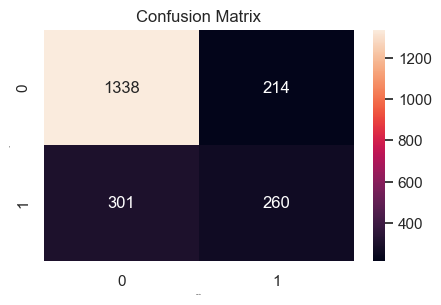

In [32]:
cm_KNN = confusion_matrix(Y_test, X_test_pred_KNN)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="rocket", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model_KNN, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred_KNN_Tuning = grid_search.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred_KNN_Tuning)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Accuracy on Test Set: 0.77520113582584


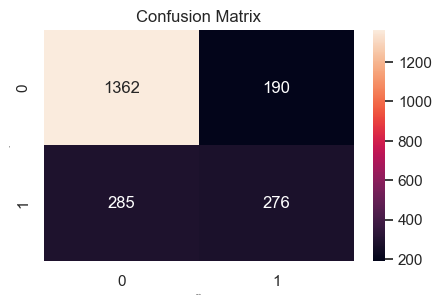

In [34]:
cm_KNN_pred = confusion_matrix(Y_test, y_pred_KNN_Tuning)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_KNN_pred, annot=True, fmt="d", cmap="rocket", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()